In [33]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [34]:
df=pd.read_csv("/kaggle/input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip",sep='\t')
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [36]:
df.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [37]:
df.dtypes

id           object
sentiment     int64
review       object
dtype: object

In [38]:
df.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

In [39]:
df.duplicated().sum()

0

In [40]:
df.drop('id', axis=1, inplace=True)
df.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [41]:
df.shape

(25000, 2)

<Axes: xlabel='sentiment', ylabel='count'>

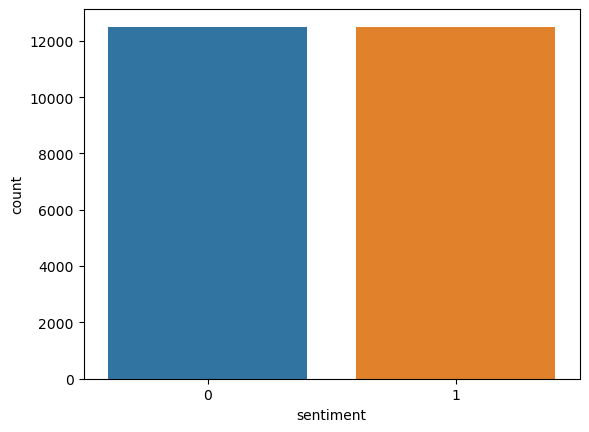

In [42]:
import seaborn as sns
import matplotlib as plt
sns.countplot(data=df,x='sentiment')


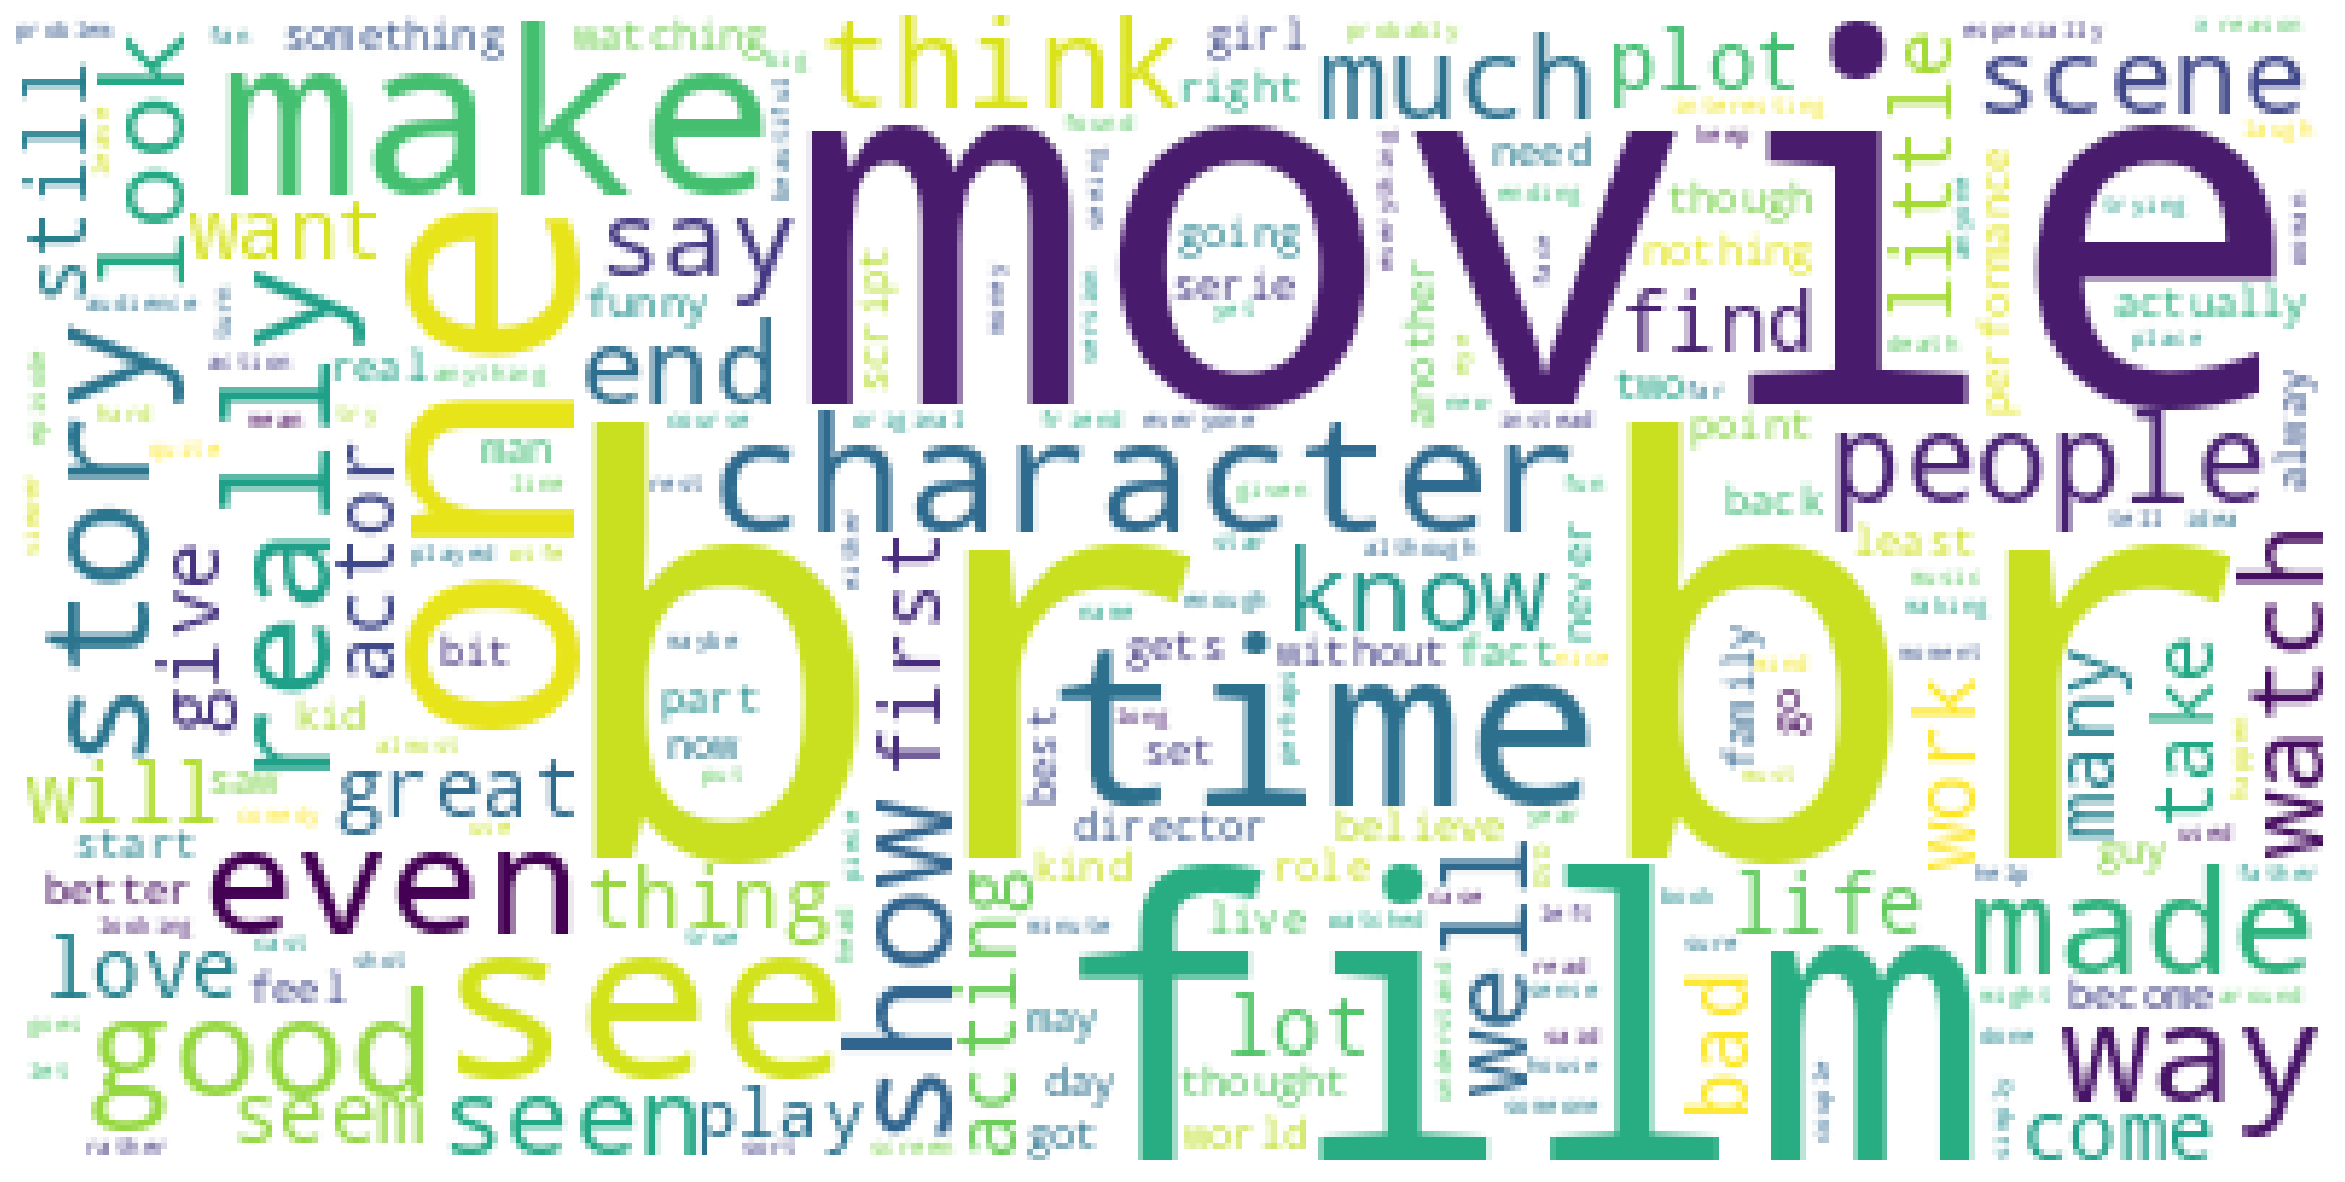

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
plt.imshow(WordCloud(background_color = 'white').generate(" ".join(df.review)))
plt.axis("off")
plt.show() 

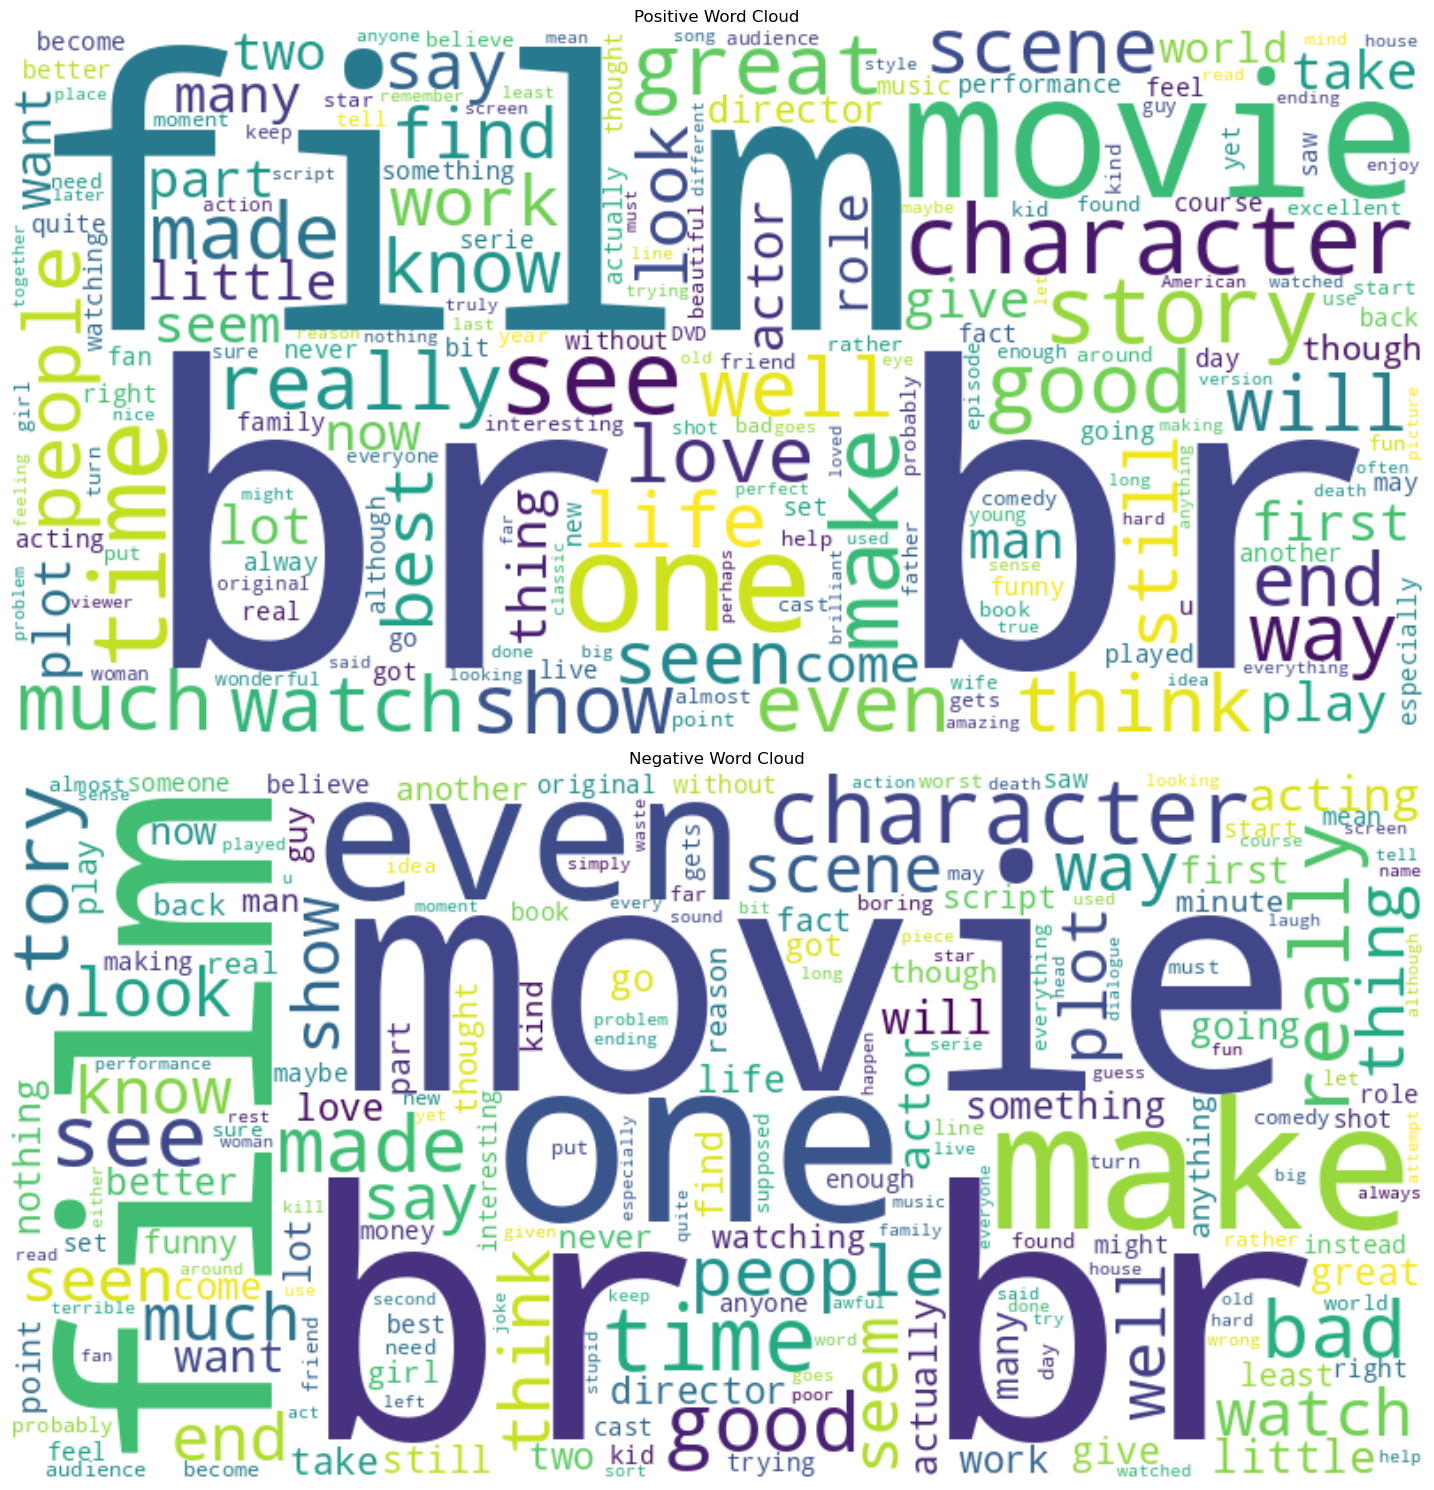

In [13]:
Positive = df[df['sentiment'] == 1]
Negative = df[df['sentiment'] == 0]

# Combine texts for spam and ham emails
positive_text = ' '.join(Positive['review'])
negative_text = ' '.join(Negative['review'])

# Generate word clouds for spam and ham emails
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word clouds with titles using matplotlib
plt.figure(figsize=(15, 15))

plt.subplot(2, 1, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title("Positive Word Cloud")
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title("Negative Word Cloud")
plt.axis('off')

plt.tight_layout()
plt.show()

In [44]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [16]:
corpus=[]

In [17]:
for i in range(0 , len(df)):
  message = re.sub('[^a-zA-Z]' , ' ' , df['review'][i])
  message = message.lower()
  message = message.split()
  ss = SnowballStemmer(language='english')
  message = [ss.stem(word) for word in message if not word in set(stopwords.words('english'))]
  message = ' '.join(message)
  corpus.append(message)

In [18]:
corpus[1]

'classic war world timothi hine entertain film obvious goe great effort length faith recreat h g well classic book mr hine succeed watch film appreci fact standard predict hollywood fare come everi year e g spielberg version tom cruis slightest resembl book obvious everyon look differ thing movi envis amateur critic look critic everyth other rate movi import base like entertain peopl never agre critic enjoy effort mr hine put faith h g well classic novel found entertain made easi overlook critic perceiv shortcom'

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
X= tfidf.fit_transform(corpus).toarray()
y = df.iloc[: , 0].values

In [24]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 0)

In [20]:
X.shape

(25000, 48956)

In [22]:
y

array([1, 1, 0, ..., 0, 0, 1])

In [25]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train , y_train)

MultinomialNB()

In [26]:
y_pred = classifier.predict(x_test)

<Axes: >

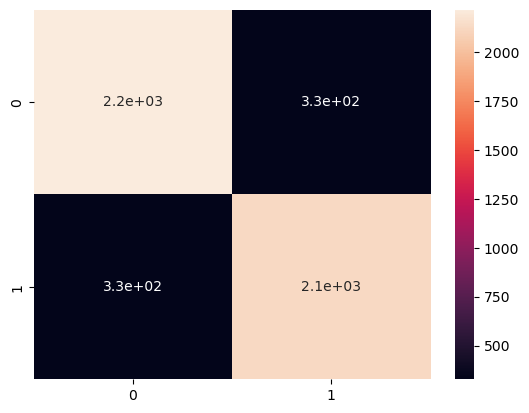

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

In [28]:
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.868
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2548
           1       0.86      0.87      0.87      2452

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



In [29]:
txt = 'What\'s up buddy how are you doing man bad'

In [30]:
import numpy as np
txt = np.array([txt])

In [31]:
txt = tfidf.transform(txt)

In [32]:
result=classifier.predict(txt)
if result[0]==0:
    print("Negative")
else:
    print('Positive')

Negative
